Name: Tarun Tanmay

Class: MBATech CE

Sem: 6

Roll No: N049


In [2]:
#Experiment 5 
#Effect of Learning Rates and optimizers on accuracy of DNN 

Importing Libraries: 

In [3]:
from sklearn.datasets import make_blobs #total number of points equally divided among clusters, no. of samples per cluster
from matplotlib import pyplot #for plotting the curves/graphs to identify relationship
from numpy import where #for returning the indices of elements in an input array where condition satisfies

In [5]:
X,y=make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

In [6]:
#make_blobs collect 1000 data points which are randomly located , with standard deviation of 2

In [7]:
X[1], y[1] 
#X is label of the training sample
#y is the output of the training sample

(array([-1.48958879, -3.47915742]), 2)

Drawing Scatter Plot: 

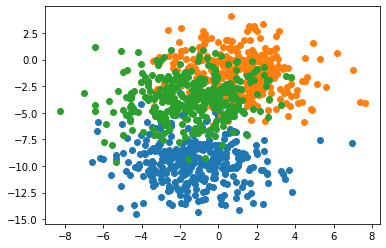

In [8]:
for class_v in range(3):
  class_r=where(y==class_v)
  pyplot.scatter(X[class_r,0], X[class_r,1])

In [ ]:
#there are 3 values for y (0,1,2)
#first feature is plotted on x axis 
#second feature is plotted on y axis 

In [9]:
from keras.utils import to_categorical #for converting categorical data into matrix having binary values
y=to_categorical(y)

In [10]:
y[10]

array([0., 1., 0.], dtype=float32)

In [ ]:
#1 in the output shows, which label is active

In [11]:
n_train=500 #training 500 samples out of 1000 for training 
train_x, test_x=X[:n_train,:], X[n_train:,:]
train_y, test_y=y[:n_train],y[n_train:]
#training for two features as x and y 

In [ ]:
#500 samples, 2 columns which represent the training data i.e number of features

In [12]:
train_y.shape

(500, 3)

Model Architecture:

In [13]:
from keras.layers import Dense #Dense function is imported to feed all outputs from the previous layer to all its Neurons of Dense Layer
from keras.models import Sequential
model = Sequential() #a sequential model of neural network is built by passing a list of layers to the sequential constructor
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))

In [ ]:
#We take 50 samples as neurons in the input layer, with 2 features
#There are 3 features in the fist hidden layer 
#softmax function is used for activation as it converts vector of K real values into a vector of K real values such that their sum is equal to 1

Compiling the Model:

In [14]:
from keras.optimizers import SGD #(stochastic gradient)
opt=SGD(lr=0.001) #learning rate is set to 0.001
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 
#we use categorical crossentropy for calculating the loss, as to train the Neural Network to output a probability over the C classes for each image

Fitting the Model:

In [15]:
history=model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=200,verbose=0)

In [ ]:
#after compiling the model, the model is fitted 
#this model (training data) is validated with the testing data 
#we are running it for 200 epochs
#verbose refers to 

Plotting the Learning Curve:

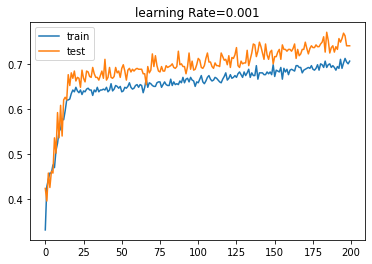

In [17]:
pyplot.plot(history.history['accuracy'],label='train') #we calculate the accuracy of the training model
pyplot.plot(history.history['val_accuracy'],label='test') #and then validate that accuracy from the testing model
pyplot.title('learning Rate=0.001')
pyplot.legend()

In [18]:
def pre_data():
  X,y=make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
  y=to_categorical(y)
  train_x,test_x=X[:n_train,:], X[n_train:,:]
  train_y,test_y=y[:n_train],y[n_train:]
  return train_x,train_y,test_x,test_y

In [19]:
def fit_model(train_x,train_y,test_x,test_y,lrate):
  model = Sequential()
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(3,activation='softmax'))
  opt=SGD(lr=lrate)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  history=model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=200,verbose=0)
  pyplot.plot(history.history['accuracy'],label='train')
  pyplot.plot(history.history['val_accuracy'],label='test')
  pyplot.title('learning Rate='+str(lrate))
  pyplot.legend()

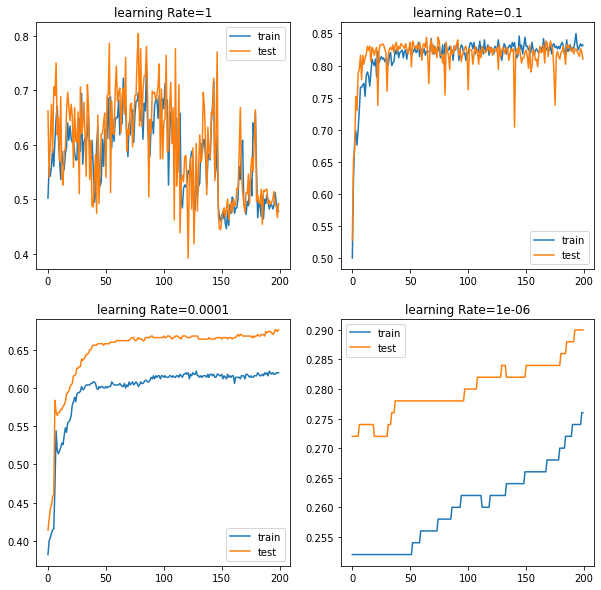

In [20]:
train_x,train_y,test_x,test_y=pre_data()
learning_rates=[1,0.1,0.0001,0.000001]
pyplot.figure(figsize=(10,10))
for i in range(len(learning_rates)):
  plot_no=220+(i+1)
  pyplot.subplot(plot_no)
  fit_model(train_x,train_y,test_x,test_y,learning_rates[i])

Conlusion:
1) For different learning rates, we obtained that for lr=0.1, it is giving us good accuracy. much better than other three learning rates. 

Momentum:

In [21]:
def fit_model(train_x,train_y,test_x,test_y,mom):
  model = Sequential()
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(3,activation='softmax'))
  opt=SGD(lr=0.01, momentum=mom)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  history=model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=200,verbose=0)
  pyplot.plot(history.history['accuracy'],label='train')
  pyplot.plot(history.history['val_accuracy'],label='test')
  pyplot.title('momentum='+str(mom))
  pyplot.legend()


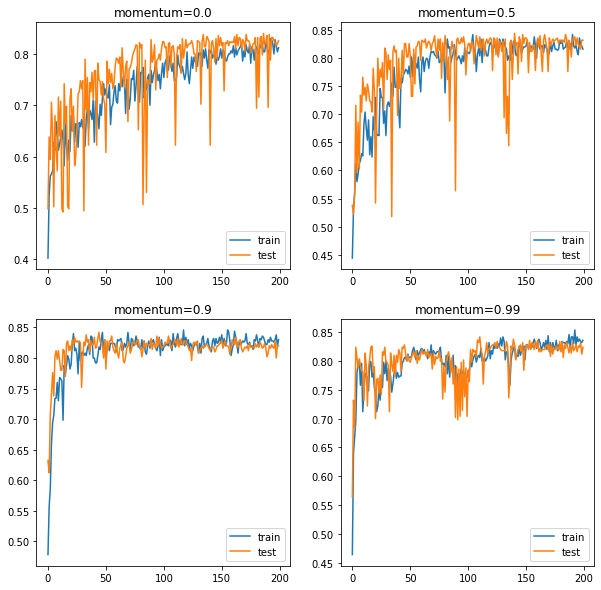

In [22]:
mom_values=[0.0,0.5,0.9,0.99]
pyplot.figure(figsize=(10,10))
for i in range(len(mom_values)):
  plot_no=220+(i+1)
  pyplot.subplot(plot_no)
  fit_model(train_x,train_y,test_x,test_y,mom_values[i])

In [ ]:
#0.9 gives the best result

In [23]:
def fit_model(train_x,train_y,test_x,test_y,optr):
  model = Sequential()
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(3,activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  history=model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=200,verbose=0)
  pyplot.plot(history.history['accuracy'],label='train')
  pyplot.plot(history.history['val_accuracy'],label='test')
  pyplot.title('momentum='+str(optr),pad=-80)
  pyplot.legend()

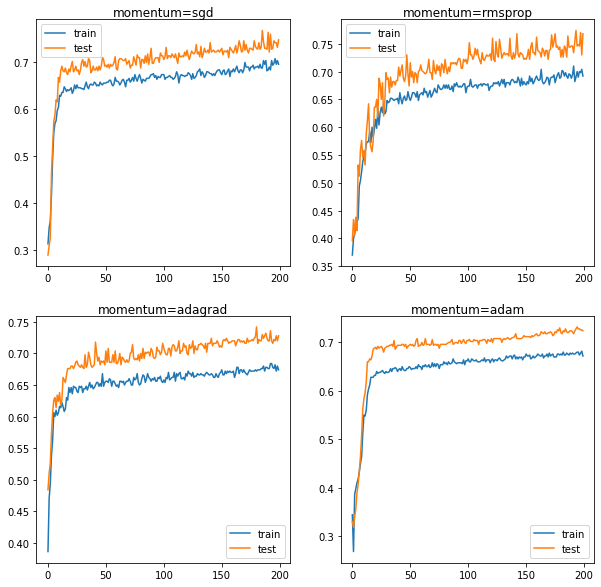

In [24]:
optr=['sgd','rmsprop','adagrad','adam'] #using different optimizers to find best one
pyplot.figure(figsize=(10,10))
for i in range(len(optr)):
  plot_no=220+(i+1)
  pyplot.subplot(plot_no)
  fit_model(train_x,train_y,test_x,test_y,optr[i])

Conclusion: 
1) For the given dataset, the stochastic gradient 
2) Rmsprop and adam are giving same, but adam gives the best since it's less oscillating

**FINAL CONCLUSION:**

1. For given data set, if SGD is used for different values of learning rates, it gives best value for learning rate = 0.1
2. For given data set, if SGD is used for learning rate = 0.01, momentum = 0.9, the training and testing accuracies converge very fast and testing accuracy comes best faster, out of all the given values.
3. For given data set, out of all the provided optimizers, adam is giving the best accuracy.